In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import (
    ImageQuant2,
    bounded_mean_1d,
    direcslist,
    dosage,
    load_image,
    nb_setup,
    raw_data_path,
)

nb_setup()

%matplotlib widget

In [2]:
# Specify paths
path = raw_data_path + "/Imaging/ring_ph"
paths = direcslist(path, 1)
lines = [p.strip("/").split("/")[-2].split("_")[1] for p in paths]
conditions = [p.strip("/").split("/")[-2].split("_")[2] for p in paths]

# Import data
imgs = [load_image(p + "/af_corrected.tif") for p in paths]
rois = [np.loadtxt(p + "/ROI_fit.txt") for p in paths]

# Import quantification model
membg = np.loadtxt("../../data/calibration_mem6.txt")
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
calibration_factor = np.loadtxt("../../data/calibration_constants.txt")[6]
print(calibration_factor)

3.105836925083751


  0%|                                                                                                                                             | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                    | 1/600 [00:00<06:26,  1.55it/s]

  1%|█▌                                                                                                                                   | 7/600 [00:00<00:49, 11.92it/s]

  2%|██▊                                                                                                                                 | 13/600 [00:00<00:27, 21.12it/s]

  3%|████▏                                                                                                                               | 19/600 [00:00<00:19, 29.28it/s]

  4%|█████▌                                                                                                                              | 25/600 [00:01<00:15, 36.32it/s]

  5%|██████▊                                                                                                                             | 31/600 [00:01<00:13, 42.01it/s]

  6%|████████▏                                                                                                                           | 37/600 [00:01<00:12, 44.48it/s]

  7%|█████████▍                                                                                                                          | 43/600 [00:01<00:12, 44.67it/s]

  8%|██████████▊                                                                                                                         | 49/600 [00:01<00:11, 47.97it/s]

  9%|████████████                                                                                                                        | 55/600 [00:01<00:10, 50.21it/s]

 10%|█████████████▍                                                                                                                      | 61/600 [00:01<00:10, 51.76it/s]

 11%|██████████████▋                                                                                                                     | 67/600 [00:01<00:10, 52.88it/s]

 12%|████████████████                                                                                                                    | 73/600 [00:01<00:09, 52.79it/s]

 13%|█████████████████▍                                                                                                                  | 79/600 [00:02<00:09, 52.38it/s]

 14%|██████████████████▋                                                                                                                 | 85/600 [00:02<00:09, 52.29it/s]

 15%|████████████████████                                                                                                                | 91/600 [00:02<00:09, 53.70it/s]

 16%|█████████████████████▎                                                                                                              | 97/600 [00:02<00:09, 54.50it/s]

 17%|██████████████████████▍                                                                                                            | 103/600 [00:02<00:08, 55.48it/s]

 18%|███████████████████████▊                                                                                                           | 109/600 [00:02<00:08, 55.32it/s]

 19%|█████████████████████████                                                                                                          | 115/600 [00:02<00:08, 55.83it/s]

 20%|██████████████████████████▍                                                                                                        | 121/600 [00:02<00:08, 53.38it/s]

 21%|███████████████████████████▋                                                                                                       | 127/600 [00:02<00:08, 54.00it/s]

 22%|█████████████████████████████▎                                                                                                     | 134/600 [00:03<00:08, 56.05it/s]

 24%|██████████████████████████████▊                                                                                                    | 141/600 [00:03<00:07, 57.47it/s]

 25%|████████████████████████████████▎                                                                                                  | 148/600 [00:03<00:07, 58.44it/s]

 26%|█████████████████████████████████▌                                                                                                 | 154/600 [00:03<00:07, 57.95it/s]

 27%|██████████████████████████████████▉                                                                                                | 160/600 [00:03<00:07, 58.07it/s]

 28%|████████████████████████████████████▏                                                                                              | 166/600 [00:03<00:07, 57.91it/s]

 29%|█████████████████████████████████████▌                                                                                             | 172/600 [00:03<00:07, 58.15it/s]

 30%|██████████████████████████████████████▊                                                                                            | 178/600 [00:03<00:07, 57.81it/s]

 31%|████████████████████████████████████████▏                                                                                          | 184/600 [00:03<00:07, 57.81it/s]

 32%|█████████████████████████████████████████▍                                                                                         | 190/600 [00:04<00:07, 58.20it/s]

 33%|██████████████████████████████████████████▊                                                                                        | 196/600 [00:04<00:06, 58.16it/s]

 34%|████████████████████████████████████████████                                                                                       | 202/600 [00:04<00:06, 58.33it/s]

 35%|█████████████████████████████████████████████▍                                                                                     | 208/600 [00:04<00:06, 58.41it/s]

 36%|██████████████████████████████████████████████▋                                                                                    | 214/600 [00:04<00:06, 58.75it/s]

 37%|████████████████████████████████████████████████                                                                                   | 220/600 [00:04<00:06, 58.98it/s]

 38%|█████████████████████████████████████████████████▎                                                                                 | 226/600 [00:04<00:06, 58.95it/s]

 39%|██████████████████████████████████████████████████▋                                                                                | 232/600 [00:04<00:06, 58.80it/s]

 40%|███████████████████████████████████████████████████▉                                                                               | 238/600 [00:04<00:06, 58.52it/s]

 41%|█████████████████████████████████████████████████████▎                                                                             | 244/600 [00:04<00:06, 57.87it/s]

 42%|██████████████████████████████████████████████████████▌                                                                            | 250/600 [00:05<00:06, 57.87it/s]

 43%|███████████████████████████████████████████████████████▉                                                                           | 256/600 [00:05<00:05, 58.10it/s]

 44%|█████████████████████████████████████████████████████████▏                                                                         | 262/600 [00:05<00:05, 58.07it/s]

 45%|██████████████████████████████████████████████████████████▌                                                                        | 268/600 [00:05<00:05, 58.01it/s]

 46%|████████████████████████████████████████████████████████████                                                                       | 275/600 [00:05<00:05, 58.76it/s]

 47%|█████████████████████████████████████████████████████████████▎                                                                     | 281/600 [00:05<00:05, 58.80it/s]

 48%|██████████████████████████████████████████████████████████████▋                                                                    | 287/600 [00:05<00:05, 58.89it/s]

 49%|███████████████████████████████████████████████████████████████▉                                                                   | 293/600 [00:05<00:05, 58.53it/s]

 50%|█████████████████████████████████████████████████████████████████▌                                                                 | 300/600 [00:05<00:04, 60.54it/s]

 51%|███████████████████████████████████████████████████████████████████                                                                | 307/600 [00:06<00:04, 61.67it/s]

 52%|████████████████████████████████████████████████████████████████████▌                                                              | 314/600 [00:06<00:04, 62.41it/s]

 54%|██████████████████████████████████████████████████████████████████████                                                             | 321/600 [00:06<00:04, 62.84it/s]

 55%|███████████████████████████████████████████████████████████████████████▌                                                           | 328/600 [00:06<00:04, 63.10it/s]

 56%|█████████████████████████████████████████████████████████████████████████▏                                                         | 335/600 [00:06<00:04, 61.61it/s]

 57%|██████████████████████████████████████████████████████████████████████████▋                                                        | 342/600 [00:06<00:04, 60.94it/s]

 58%|████████████████████████████████████████████████████████████████████████████▏                                                      | 349/600 [00:06<00:04, 60.42it/s]

 59%|█████████████████████████████████████████████████████████████████████████████▋                                                     | 356/600 [00:06<00:04, 60.15it/s]

 60%|███████████████████████████████████████████████████████████████████████████████▎                                                   | 363/600 [00:06<00:03, 59.63it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▌                                                  | 369/600 [00:07<00:03, 58.45it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████▉                                                 | 375/600 [00:07<00:03, 58.71it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████▏                                               | 381/600 [00:07<00:03, 58.56it/s]

 64%|████████████████████████████████████████████████████████████████████████████████████▍                                              | 387/600 [00:07<00:03, 58.58it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▊                                             | 393/600 [00:07<00:03, 58.66it/s]

 66%|███████████████████████████████████████████████████████████████████████████████████████                                            | 399/600 [00:07<00:03, 58.76it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▍                                          | 405/600 [00:07<00:03, 58.63it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████▋                                         | 411/600 [00:07<00:03, 58.54it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████                                        | 417/600 [00:07<00:03, 58.64it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 423/600 [00:07<00:03, 58.80it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 429/600 [00:08<00:02, 58.96it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 436/600 [00:08<00:02, 60.47it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 443/600 [00:08<00:02, 61.76it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 450/600 [00:08<00:02, 61.84it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 457/600 [00:08<00:02, 61.02it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 464/600 [00:08<00:02, 60.43it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 471/600 [00:08<00:02, 59.92it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 477/600 [00:08<00:02, 59.57it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 483/600 [00:08<00:01, 59.65it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 489/600 [00:09<00:01, 59.04it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 495/600 [00:09<00:01, 58.38it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 501/600 [00:09<00:01, 58.34it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 507/600 [00:09<00:01, 58.64it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 513/600 [00:09<00:01, 58.60it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 520/600 [00:09<00:01, 59.59it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 527/600 [00:09<00:01, 61.07it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 534/600 [00:09<00:01, 62.07it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 541/600 [00:09<00:00, 62.53it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 548/600 [00:10<00:00, 63.13it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 555/600 [00:10<00:00, 63.41it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 562/600 [00:10<00:00, 63.51it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 569/600 [00:10<00:00, 63.85it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 576/600 [00:10<00:00, 64.14it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 583/600 [00:10<00:00, 64.21it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 590/600 [00:10<00:00, 64.55it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 597/600 [00:10<00:00, 64.28it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:10<00:00, 55.39it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

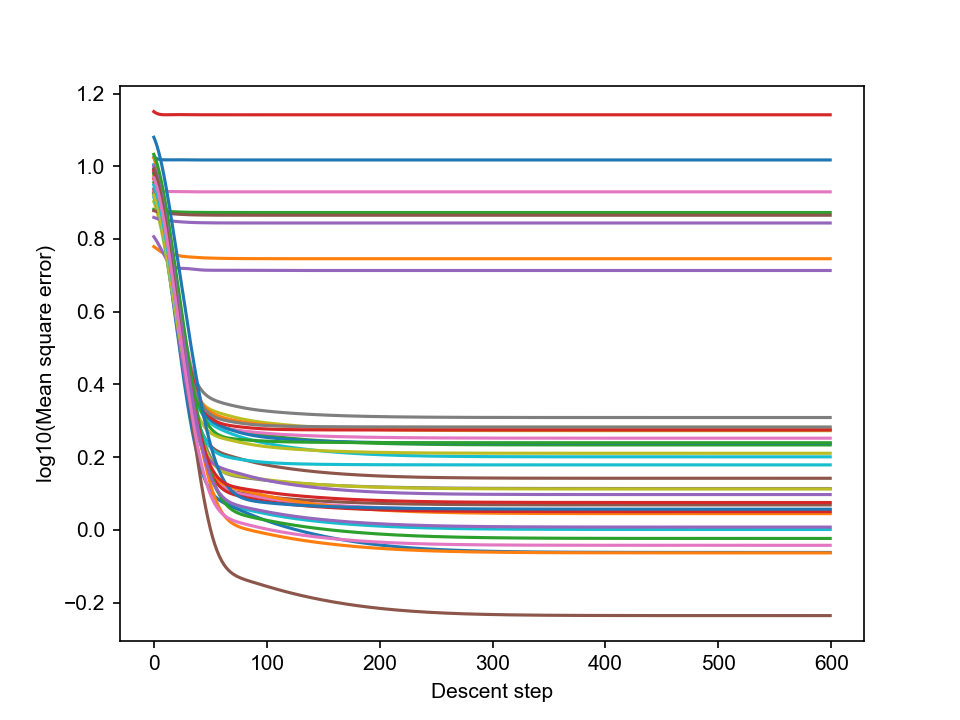

In [3]:
# Quantification
iq = ImageQuant2(
    img=imgs, roi=rois, cytbg=cytbg, membg=membg, pooling_rate=1, rol_ave=5, nfits=100
)
iq.quantify()
iq.plot_losses(log=True)

In [4]:
# iq.plot_fits()

In [5]:
# iq.plot_quantification()

In [6]:
# Compile and save results
res = iq.compile_res()
res["Membrane signal"] *= calibration_factor
res.to_csv("../../data/ring_ph_quantification.csv", index=False)

In [7]:
# Perform summary quantification
res = pd.read_csv("../../data/ring_ph_quantification.csv")
cyts = res.groupby("Frame").apply(lambda x: np.mean(x["Cytoplasmic signal"]))
mems_tot = res.groupby("Frame").apply(lambda x: np.mean(x["Membrane signal"]))
mems_ant = res.groupby("Frame").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.25, 0.75))
)
mems_post = res.groupby("Frame").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.75, 0.25))
)
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot

df_dict = {
    "Path": paths,
    "Line": lines,
    "Condition": conditions,
    "Cyt": cyts,
    "Mem_tot": mems_tot,
    "Mem_ant": mems_ant,
    "Mem_post": mems_post,
    "ASI": asis,
    "Dosage": dosages,
    "Total": totals,
}
df = pd.DataFrame(df_dict)
df["Path"] = df["Path"].apply(lambda x: x[len(raw_data_path) :])
df.to_csv("../../data/ring_ph_embryos.csv")

### Remove polar body

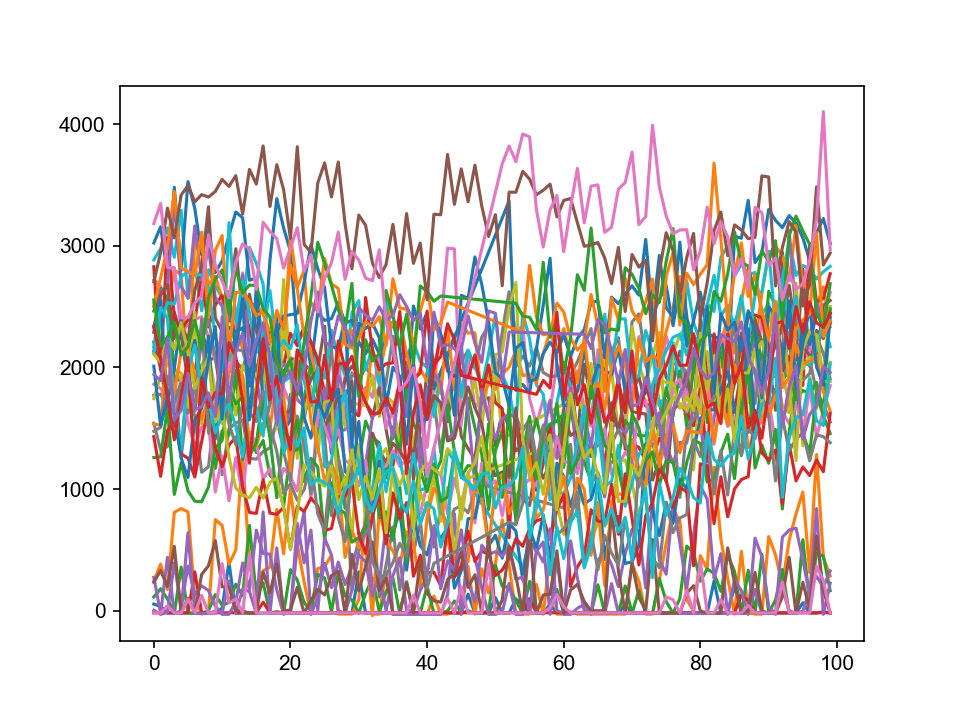

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]


fig, ax = plt.subplots()
res = pd.read_csv("../../data/ring_ph_quantification.csv")
res_grouped = res.groupby("Frame")
for (g, r), p, roi in zip(res_grouped, paths, rois):
    _mems = r["Membrane signal"]
    mems = _mems.to_numpy()
    if os.path.exists(p + "/polar_body.txt"):
        polar_body = np.loadtxt(p + "/polar_body.txt")
        ind = int(
            100 * np.argmin(np.linalg.norm(roi - polar_body, axis=1)) / roi.shape[0]
        )
        mems[ind - 5 : ind + 5] = np.nan
        nans, x = nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])
    ax.plot(mems)
    res.loc[_mems.index, "Membrane signal"] = mems
res.to_csv("../../data/ring_ph_quantification_no_pb.csv", index=False)

In [9]:
# Perform summary quantification
res = pd.read_csv("../../data/ring_ph_quantification_no_pb.csv")
cyts = res.groupby("Frame").apply(lambda x: np.mean(x["Cytoplasmic signal"]))
mems_tot = res.groupby("Frame").apply(lambda x: np.mean(x["Membrane signal"]))
mems_ant = res.groupby("Frame").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.25, 0.75))
)
mems_post = res.groupby("Frame").apply(
    lambda x: bounded_mean_1d(x["Membrane signal"], (0.75, 0.25))
)
asis = [(p - a) / (a + p) for a, p in zip(mems_ant, mems_post)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]
totals = cyts + 0.174 * mems_tot

df_dict = {
    "Path": paths,
    "Line": lines,
    "Condition": conditions,
    "Cyt": cyts,
    "Mem_tot": mems_tot,
    "Mem_ant": mems_ant,
    "Mem_post": mems_post,
    "ASI": asis,
    "Dosage": dosages,
    "Total": totals,
}
df = pd.DataFrame(df_dict)
df["Path"] = df["Path"].apply(lambda x: x[len(raw_data_path) :])
df.to_csv("../../data/ring_ph_embryos_no_pb.csv")